In [6]:
#import the directories
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [7]:
#pip install ucimlrepo
from ucimlrepo import fetch_ucirepo  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
#print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
#print(breast_cancer_wisconsin_diagnostic.variables) 

In [8]:
#Other type of data 
df = pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [9]:
df.info()
#check for null values in the DataFrame
null_values = df.isnull().sum()

#Display the columns with null values (if any ) along with their counts
print ("Columns with Null Values: ")
print (null_values[null_values > 0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
#drop unnecessary columns
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)

In [11]:
df['diagnosis'].replace({'M': '1.0', 'B': '0.0'}, inplace=True)

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


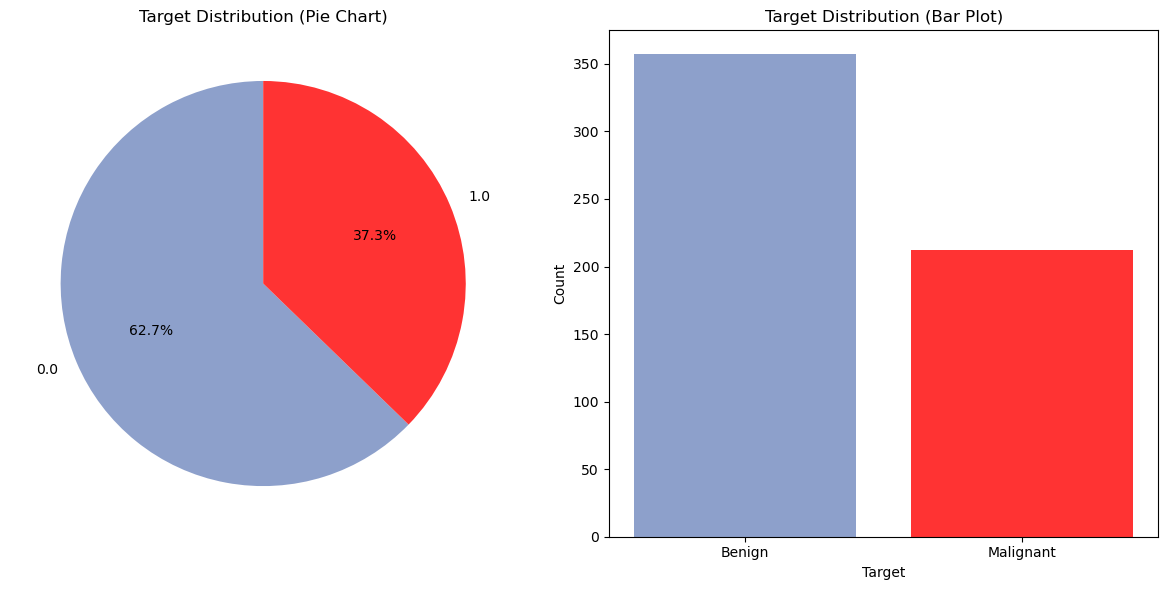

In [7]:
# Count the values in the 'target' column
target_count = df['diagnosis'].value_counts()

# Define custom colors for the pie chart and bar plot
pie_colors = ['#8da0cb', '#FF3333']
bar_colors = ['#8da0cb', '#FF3333']

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
# Plot the pie chart on the first subplot with custom colors
axs[0].pie(target_count, labels=target_count.index, autopct='%1.1f%%', startangle=90, colors=pie_colors)
axs[0].set_title('Target Distribution (Pie Chart)')

# Plot the bar plot on the second subplot with custom colors
axs[1].bar(target_count.index, target_count.values, color=bar_colors)
axs[1].set_xticks(target_count.index)
axs[1].set_xticklabels(['Benign', 'Malignant'])
axs[1].set_xlabel('Target')
axs[1].set_ylabel('Count')

axs[1].set_title('Target Distribution (Bar Plot)')

plt.tight_layout()
plt.show()

Deciding which feature to drop using covariance 


In [15]:
y_column = df.columns[0]
x_columns = df.drop(['diagnosis'], axis=1).columns

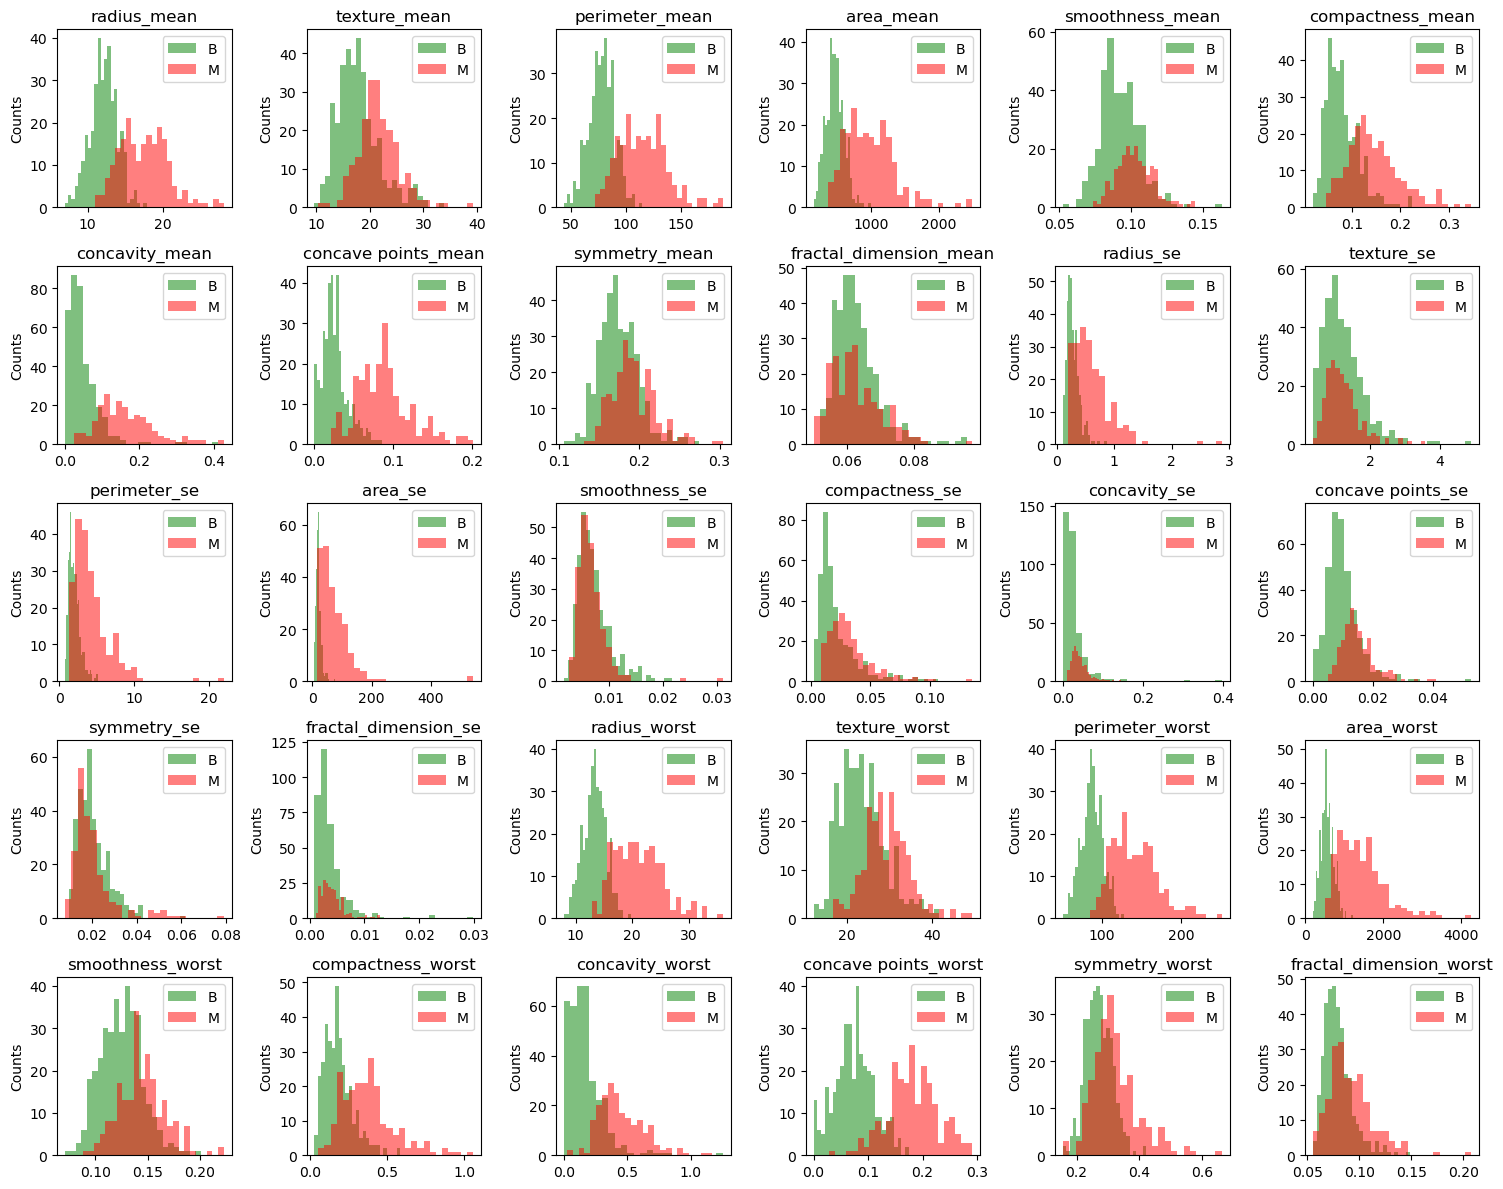

In [19]:
plt.figure(figsize=(15,12))

for i, col in enumerate(df.columns[1:]):
    plt.subplot(5,6, i+1).set_title(col)

    x_col = df[x_columns[i]].values
    y_col = df[y_column].values

    #print (x_col)
    #print (y_col)
    plt.hist (x_col[y_col == '0.0'], label='B', color='green', alpha=0.5, bins=25)
    plt.hist (x_col[y_col=='1.0'], label='M', color='Red', alpha=0.5, bins=25)

    plt.ylabel("Counts")
    plt.legend (loc='best')

plt.tight_layout()
plt.show()


In [23]:
#Feature Selection Based on Mutual Information Gain 
#finds the dependency between two variables, the higher the value the dependency increases
#if MI is 0 then we var is independent
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(labels=['diagnosis'], axis=1),
    df['diagnosis'],
    test_size=0.3,
    random_state=0)
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([3.36955959e-01, 8.60561079e-02, 3.92246426e-01, 3.50023061e-01,
       9.62441726e-02, 2.78536015e-01, 3.83275012e-01, 4.57726139e-01,
       7.29716996e-02, 3.77065439e-04, 2.60308081e-01, 1.01090144e-02,
       2.62048923e-01, 3.21504462e-01, 1.15618018e-02, 6.84538932e-02,
       1.25602036e-01, 1.32418892e-01, 3.77364937e-03, 5.22132651e-02,
       4.30178435e-01, 1.16782865e-01, 4.61057871e-01, 4.52848271e-01,
       9.78276521e-02, 2.32583965e-01, 3.28210143e-01, 4.60909670e-01,
       6.96512599e-02, 3.30053677e-02])

In [24]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

perimeter_worst            0.461058
concave points_worst       0.460910
concave points_mean        0.457726
area_worst                 0.452848
radius_worst               0.430178
perimeter_mean             0.392246
concavity_mean             0.383275
area_mean                  0.350023
radius_mean                0.336956
concavity_worst            0.328210
area_se                    0.321504
compactness_mean           0.278536
perimeter_se               0.262049
radius_se                  0.260308
compactness_worst          0.232584
concave points_se          0.132419
concavity_se               0.125602
texture_worst              0.116783
smoothness_worst           0.097828
smoothness_mean            0.096244
texture_mean               0.086056
symmetry_mean              0.072972
symmetry_worst             0.069651
compactness_se             0.068454
fractal_dimension_se       0.052213
fractal_dimension_worst    0.033005
smoothness_se              0.011562
texture_se                 0

<Axes: >

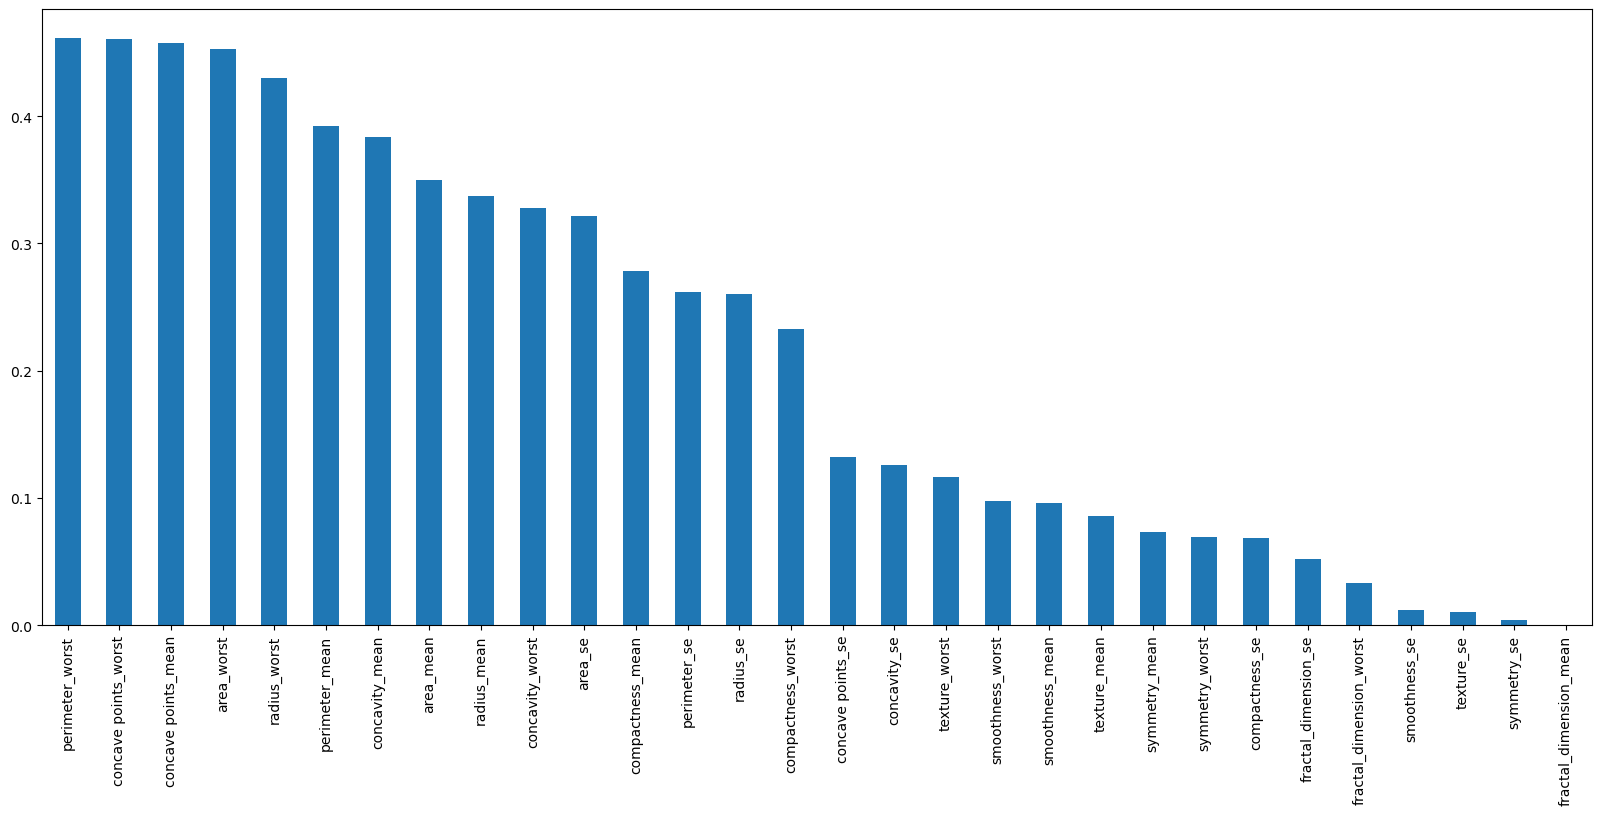

In [25]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

<h1>KNN</h1>
It is classification algorithm, working off the assumption that similar points can be found near one another.
<b>K</b> is the number of nearest neighbors that needs to be considered while making prediction.

In [26]:
from sklearn.feature_selection import SelectKBest
sel_ten_cols= SelectKBest (mutual_info_classif, k=10)
sel_ten_cols.fit (X_train, y_train)
X_train.columns[sel_ten_cols.get_support()]

Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')

In [27]:
#standardizing the data
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print (X_train)

[[-0.74998027 -1.09978744 -0.74158608 ... -0.6235968   0.07754241
   0.45062841]
 [-1.02821446 -0.1392617  -1.02980434 ... -0.7612376  -1.07145262
  -0.29541379]
 [-0.53852228 -0.29934933 -0.56857428 ... -0.50470441  0.34900827
  -0.13371556]
 ...
 [-1.3214733  -0.20855336 -1.3143845  ... -0.98621857 -0.69108476
  -0.13148524]
 [-1.24245479 -0.23244704 -1.27759928 ... -1.7562754  -1.55125275
  -1.01078909]
 [-0.74441558  1.13188181 -0.72016173 ... -0.28490593 -1.2308599
   0.20083251]]


In [28]:
#Training Model, start with considering 3 neighbors
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [31]:
y_pred = knn.predict(X_test)
accuracy= accuracy_score(y_test, y_pred)
print ("Accuracy",accuracy)

Accuracy 0.935672514619883


In [50]:
def report(pred, actual):
    accuracy = round(accuracy_score( actual, pred), 4)
    precision = round(precision_score(actual,pred,pos_label='1.0'), 4)
    recall = round(recall_score(actual,pred,pos_label='1.0'), 4)
    f1 = round(f1_score(actual,pred,pos_label='1.0'), 4)
        
    print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nf1_score: {f1}')

In [51]:
pred=y_pred
actual=y_test
report(pred,actual)

Accuracy: 0.9357
Precision: 0.9483
Recall: 0.873
f1_score: 0.9091


In [52]:
y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)
print("Train quality:")
report(y_train_knn, y_train)
print("\nTest quality:")
report(y_test_knn, y_test)

Train quality:
Accuracy: 0.9824
Precision: 0.9863
Recall: 0.9664
f1_score: 0.9763

Test quality:
Accuracy: 0.9357
Precision: 0.9483
Recall: 0.873
f1_score: 0.9091


<h1>FIND BEST KNN VALUE </h1>

In [56]:
from sklearn.model_selection import cross_val_score
import numpy as np
k_values = [i for i in range (1,31)]
scores = []
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
for k in k_values:
    knn = KNeighborsClassifier (n_neighbors=k)
    score= cross_val_score(knn, X,y,cv=5) #cv is cross-validation splitting strategy.
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy score')

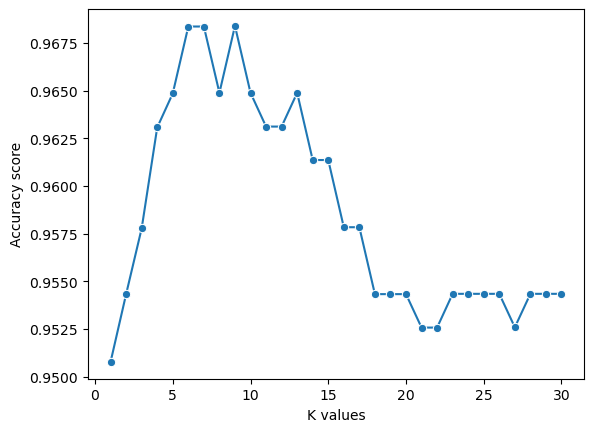

In [60]:
sns.lineplot (x=k_values, y=scores, marker= "o")
plt.xlabel("K values")
plt.ylabel("Accuracy score")

In [64]:
best_index= np.argmax(scores)
best_k=k_values[best_index]

knn=KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred= knn.predict(X_test)
report (y_pred, y_test)

Accuracy: 0.9649
Precision: 0.9831
Recall: 0.9206
f1_score: 0.9508


In [65]:
print (best_index)

8
